<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Data_Driven_Models(AirlinesData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving AirlinesData.xlsx to AirlinesData.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ps = pd.read_excel("AirlinesData.xlsx")
ps

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


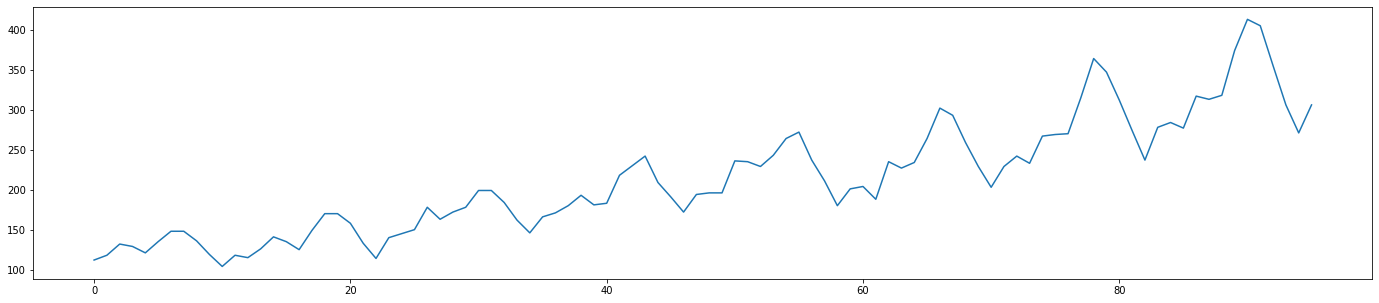

In [4]:
plt.figure(figsize=(24,5))
ps.Passengers.plot()

# Splitting data

In [5]:
Train = ps.head(84)
Test = ps.tail(12)

In [6]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [7]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


# Moving Average 

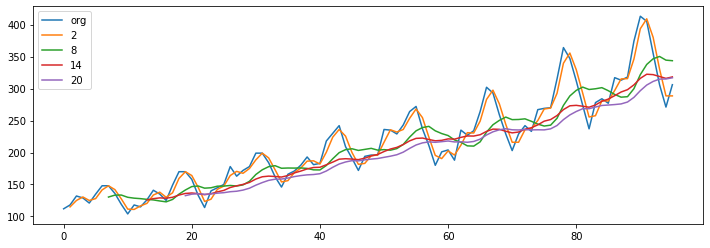

In [8]:
plt.figure(figsize=(12,4))
ps.Passengers.plot(label="org")
for i in range(2,24,6):
    ps["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


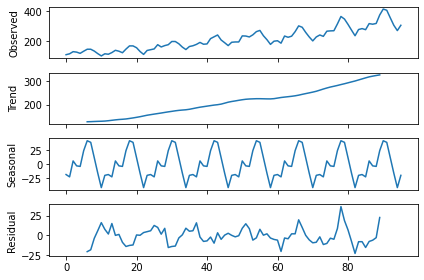

In [9]:
decompose_ts_add = seasonal_decompose(ps.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


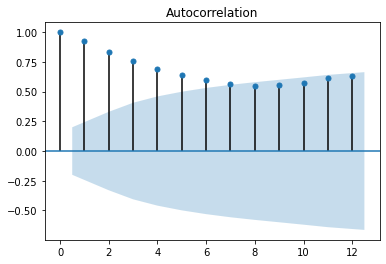

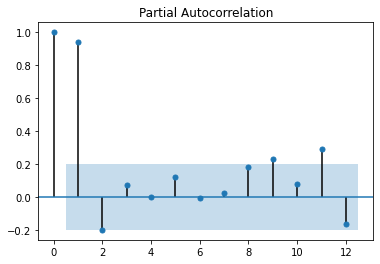

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ps.Passengers,lags=12)
tsa_plots.plot_pacf(ps.Passengers,lags=12)
plt.show()


### Evaluation Metric MAPE

In [11]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [16]:
ses_model = SimpleExpSmoothing(Train.Passengers).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 


13.411274740513653

### Holt method 

In [18]:
# Holt method 
hw_model = Holt(Train.Passengers).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

23.494677034614366

### Holts winter exponential smoothing with additive seasonality and additive trend


In [19]:
hwe_model_add_add = ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1.6177582345226866

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(Train.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8203589155579554

## Final Model by combining train and test

In [21]:
hwe_model_add_add = ExponentialSmoothing(ps.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [22]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060923
101    408.899129
102    446.143114
103    433.358026
104    382.762460
105    336.170254
dtype: float64